In [4]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import pickle
from utility import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df1 = pd.read_csv('data/train_transaction.csv')
df2 = pd.read_csv('data/train_identity.csv')
df1.index = df1['TransactionID']
df2.index = df2['TransactionID']


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2987005,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987006,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987007,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987008,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
del df1['TransactionID']
del df2['TransactionID']

In [9]:
df1.sample(10)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
3115366,0,2561360,44.000,W,12695,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3093804,0,2130019,100.000,R,3983,583.0,150.0,visa,226.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045224,0,1352828,50.000,H,7585,553.0,150.0,visa,226.0,credit,...,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
3362566,0,9389860,59.000,W,1555,555.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3304013,0,7895822,151.000,W,2567,420.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3068057,0,1736435,315.000,W,8695,170.0,150.0,visa,226.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3511028,0,13776191,51.950,W,12932,361.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3573034,0,15690228,100.000,R,10486,514.0,150.0,mastercard,219.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3012466,0,662930,43.950,W,17618,345.0,150.0,mastercard,137.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df2.sample(10)

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3012412,-5.0,233189.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,F,desktop,Windows
3525638,-5.0,29488.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
3100942,-5.0,24104.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
3439627,-20.0,720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,F,F,F,F,NaN,NaN
3045555,-5.0,44777.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,F,T,mobile,iOS Device
3073431,-20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,match_status:2,F,F,F,F,NaN,NaN
3133785,0.0,98636.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome generic,NaN,NaN,NaN,F,F,T,T,mobile,Moto G (4) Build/NPJS25.93-14-13
3020651,-5.0,186611.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3103735,0.0,125498.0,0.0,0.0,11.0,-12.0,NaN,NaN,0.0,0.0,...,chrome 62.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,D5106


In [11]:
df = df1.join(df2)

In [14]:
categoricalColumns = df.columns[df.dtypes==object]
numericColumns = df.columns[df.dtypes!=object]
categoricalColumns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

(array([108.,  69.,  19.,   0.,  14.,   1.,   1., 121.,  57.,  12.]),
 array([0.        , 0.09919616, 0.19839232, 0.29758848, 0.39678464,
        0.4959808 , 0.59517696, 0.69437312, 0.79356928, 0.89276544,
        0.99196159]),
 <a list of 10 Patch objects>)

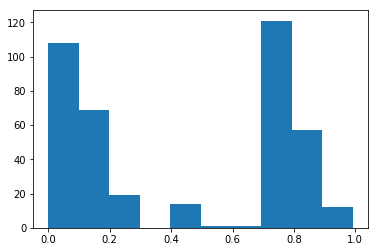

In [15]:
percentNa = df[numericColumns].isna().sum()/ len(df)
plt.hist(percentNa)

In [16]:
lowPercentColumns = numericColumns[percentNa < .3]
midPercentColumns = numericColumns[(percentNa > .3) & (percentNa < .7)]
midAndLowPercentColumns = numericColumns[percentNa < .7]

In [17]:
for column in lowPercentColumns:
    df[column] = df[column].fillna(df[column].mean())

In [18]:
for column in midPercentColumns:
    df["%s_isnan"%column] = df[column].isna()
    df[column] = df[column].fillna(df[column].mean())

(array([212.,   0.,   0.,   0.,   0.,   0.,   0., 121.,  57.,  12.]),
 array([0.        , 0.09919616, 0.19839232, 0.29758848, 0.39678464,
        0.4959808 , 0.59517696, 0.69437312, 0.79356928, 0.89276544,
        0.99196159]),
 <a list of 10 Patch objects>)

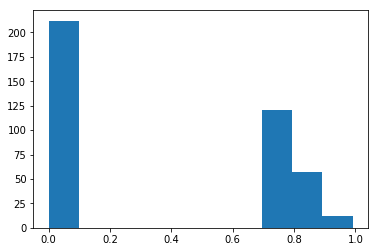

In [19]:
percentNa = df[numericColumns].isna().sum()/ len(df)
plt.hist(percentNa)

In [23]:
categoricalColumnsExceptEmail = categoricalColumns#.to_list()
del categoricalColumnsExceptEmail[3:5]

AttributeError: __delitem__

In [24]:
for column in categoricalColumnsExceptEmail:
    df[column] = cleanedCategoricalWithTooManyOptions(df, column)

In [26]:
dfCategoricalExceptEmailDummied = pd.get_dummies(df[categoricalColumnsExceptEmail])
dfCategoricalExceptEmailDummied.columns

Index(['ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S',
       'ProductCD_W', 'card4_american express', 'card4_discover',
       'card4_mastercard', 'card4_other', 'card4_visa', 'card6_credit',
       'card6_debit', 'card6_other', 'M1_T', 'M1_other', 'M2_F', 'M2_T',
       'M3_F', 'M3_T', 'M4_M0', 'M4_M1', 'M4_M2', 'M5_F', 'M5_T', 'M6_F',
       'M6_T', 'M7_F', 'M7_T', 'M8_F', 'M8_T', 'M9_F', 'M9_T', 'id_12_Found',
       'id_12_NotFound', 'id_15_Found', 'id_15_New', 'id_15_Unknown',
       'id_16_Found', 'id_16_NotFound', 'id_23_other', 'id_27_other',
       'id_28_Found', 'id_28_New', 'id_29_Found', 'id_29_NotFound',
       'id_30_Windows 10', 'id_30_Windows 7', 'id_30_other',
       'id_31_chrome 62.0', 'id_31_chrome 63.0', 'id_31_chrome 64.0',
       'id_31_chrome 65.0', 'id_31_ie 11.0 for desktop',
       'id_31_mobile safari 11.0', 'id_31_mobile safari generic',
       'id_31_other', 'id_31_safari generic', 'id_33_1334x750',
       'id_33_1366x768', 'id_33_1920x1080', 

In [27]:
dfEmails = df[['P_emaildomain', 'R_emaildomain']]

In [28]:
#getEmailService = lambda x: x.split('.', maxsplit=1)[0] if type(x)==str else ''
def getEmailService(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    return xSplit[0].replace('ymail', 'yahoo')
def getEmailDomain(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    if len(xSplit) > 1:
        return xSplit[1]
    return ''
df['P_emailservice'] = dfEmails['P_emaildomain'].map(getEmailService)
df['P_emaildomain']  = dfEmails['P_emaildomain'].map(getEmailDomain)
df['R_emailservice'] = dfEmails['R_emaildomain'].map(getEmailService)
df['R_emaildomain']  = dfEmails['R_emaildomain'].map(getEmailDomain)

In [29]:
emailColumns = ['P_emailservice', 'P_emaildomain', 'R_emailservice', 'R_emaildomain'] 
for column in emailColumns:
    df[column] = cleanedCategoricalWithTooManyOptions(df, column)

In [30]:
dfEmailDummied = pd.get_dummies(df[emailColumns])

In [31]:
dfEmailDummied.columns

Index(['P_emailservice_', 'P_emailservice_anonymous', 'P_emailservice_aol',
       'P_emailservice_comcast', 'P_emailservice_gmail',
       'P_emailservice_hotmail', 'P_emailservice_icloud',
       'P_emailservice_other', 'P_emailservice_yahoo', 'P_emaildomain_',
       'P_emaildomain_com', 'P_emaildomain_net', 'P_emaildomain_other',
       'R_emailservice_', 'R_emailservice_anonymous', 'R_emailservice_gmail',
       'R_emailservice_hotmail', 'R_emailservice_other',
       'R_emailservice_yahoo', 'R_emaildomain_', 'R_emaildomain_com',
       'R_emaildomain_other'],
      dtype='object')

In [39]:
print(dfEmailDummied.shape)
print(dfCategoricalExceptEmailDummied.shape)
print(df[midAndLowPercentColumns].shape)

(590540, 22)
(590540, 79)
(590540, 212)


In [40]:
df_concat = pd.concat([df[midAndLowPercentColumns], dfEmailDummied, dfCategoricalExceptEmailDummied], axis=1)

In [45]:
with open('dataframe.pd', 'wb') as f:
    pickle.dump(df_concat, f)